# Singapore’s 50 Richest

https://www.forbes.com/singapore-billionaires/list/#tab:overall

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2021

url = 'http://www.forbes.com/ajax/list/data'

parameter =  {'type': 'person', 'year': year, 'uri': 'singapore-billionaires'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
rank = []
name = []
worth = []
source = []

for i in range(50):
  rank.append(r.json()[i]['rank'])
  name.append(r.json()[i]['name'])
  worth.append(r.json()[i]['worth'])
  source.append(r.json()[i]['source'])

# Create Dataframe

In [5]:
data = {
  'rank': rank,
  'name': name,
  'worth ($)': worth,
  'source': source
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df.head()

,rank,name,worth ($),source
0,1,Li Xiting,23000.0,medical devices
1,2,Eduardo Saverin,20500.0,Facebook
2,3,Goh Cheng Liang,18600.0,paints
3,4,Zhang Yong & Shu Ping,16000.0,restaurants
4,5,Forrest Li,15900.0,gaming


In [7]:
df.tail()

,rank,name,worth ($),source
45,46,John Lim,950.0,real estate
46,47,Anthony Tan,790.0,"on-demand transportation, mobile software"
47,48,Cheng Wai Keung,760.0,real estate
48,49,Min-Liang Tan,755.0,gaming
49,50,Saurabh Mittal,735.0,finance


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       50 non-null     int64  
 1   name       50 non-null     object 
 2   worth ($)  50 non-null     float64
 3   source     50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [9]:
df['rank'] = df['rank'].astype('category')                      # change Rank data type to categorical                
df['rank'].dtypes

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
                  46, 47, 48, 49, 50],
, ordered=False)

In [10]:
df.describe(include='object')

,name,source
count,50,50
unique,50,31
top,Li Xiting,real estate
freq,1,9


In [11]:
df.describe()

,worth ($)
count,50.000000
mean,4154.200000
std,5633.678553
min,735.000000
25%,1125.000000
50%,1705.000000
75%,2987.500000
max,23000.000000


<AxesSubplot:xlabel='worth ($)', ylabel='Density'>

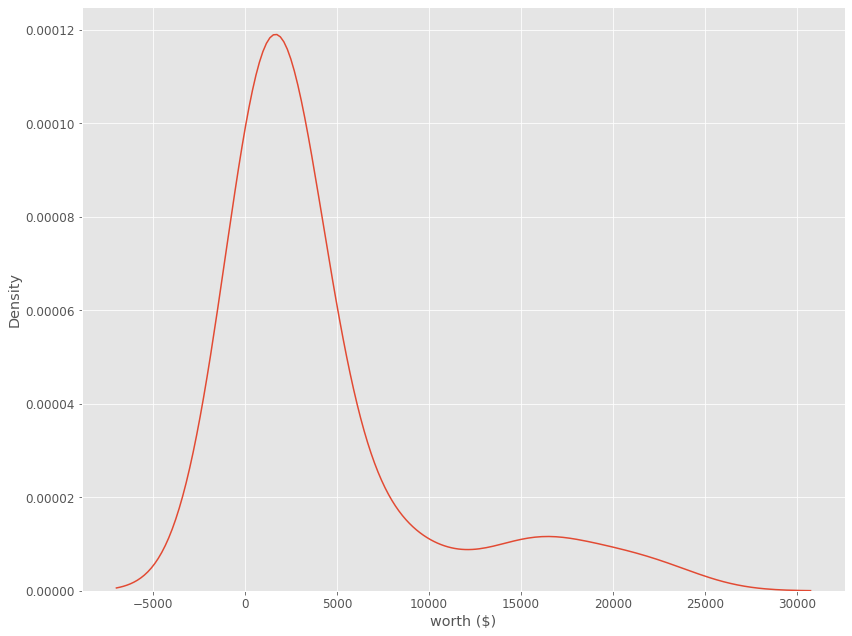

In [12]:
sns.kdeplot(x=df['worth ($)'])

In [13]:
df['source'].value_counts()

real estate                                  9
banking                                      4
investments                                  3
retail                                       3
gaming                                       3
diversified                                  3
medical devices                              1
retail, property                             1
flipkart                                     1
Shoes                                        1
power                                        1
real estate, hotels                          1
Manufacturing                                1
health care                                  1
property                                     1
on-demand transportation, mobile software    1
semiconductors                               1
cryptocurrency exchange                      1
technology                                   1
frozen foods                                 1
Facebook                                     1
mining       

# Grouping and Aggregation

In [14]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def billion(x, pos):
  return '$%1.1fB' % (x * 1e-3)

format_bill = FuncFormatter(billion)

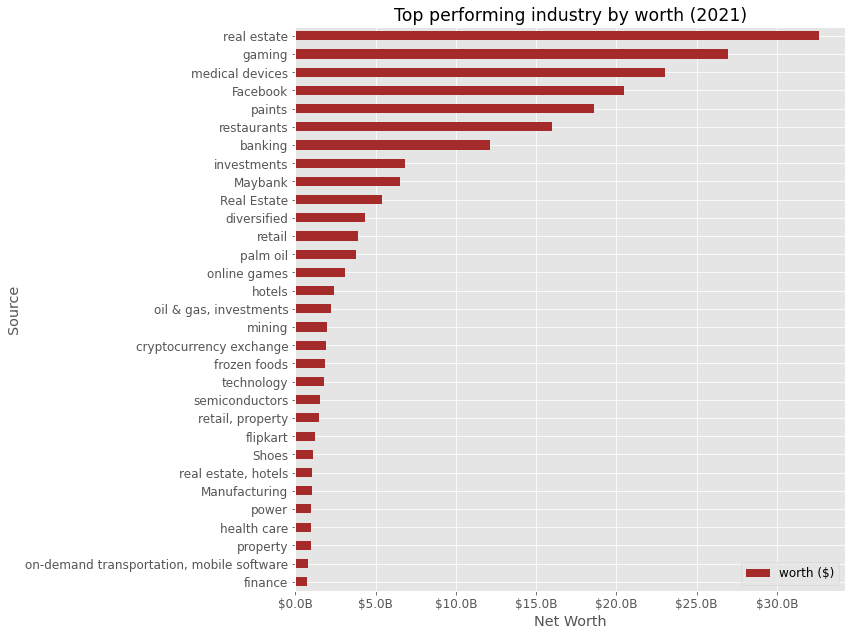

In [15]:
ax = df.groupby('source')\
       .agg(np.sum)\
       .sort_values(by='worth ($)', ascending=True)\
       .plot(kind='barh', color='brown')

ax.set(title='Top performing industry by worth (2021)', xlabel='Net Worth', ylabel='Source')
ax.xaxis.set_major_formatter(format_bill)

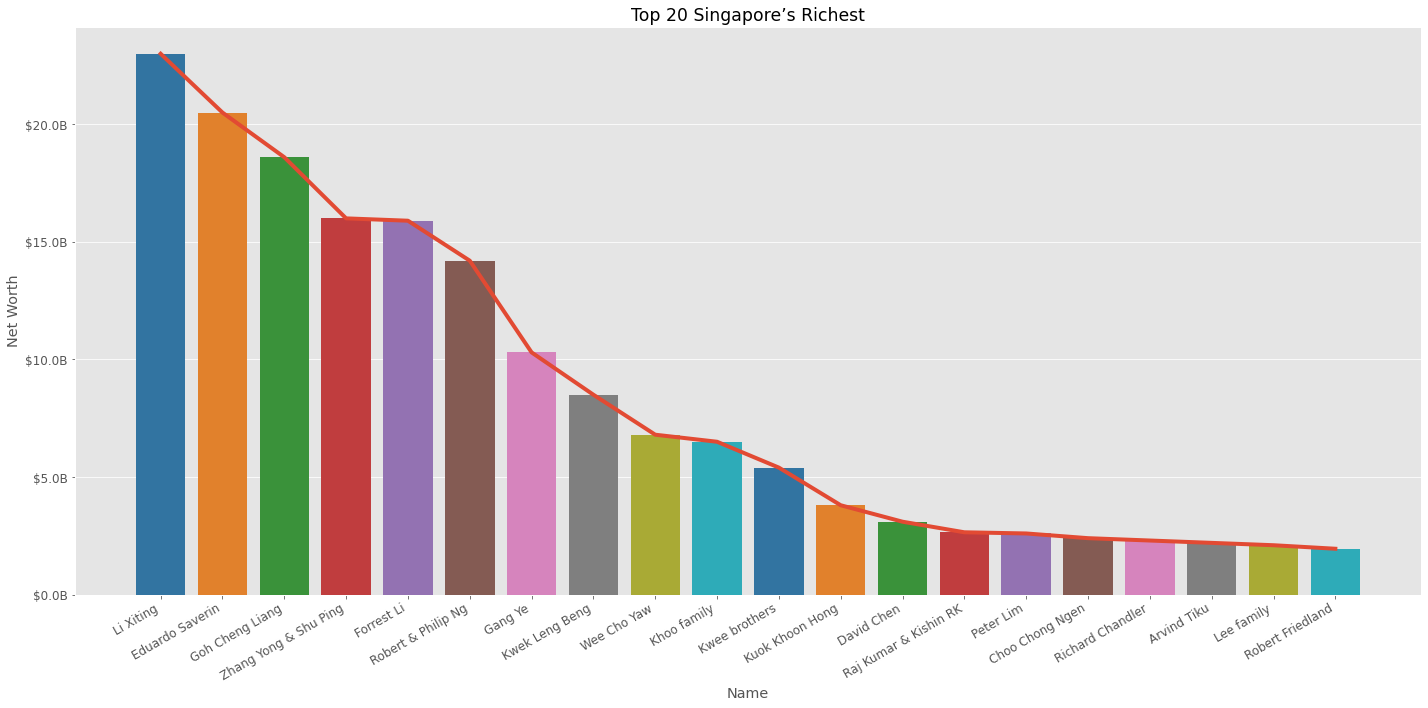

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.autofmt_xdate()

sns.barplot(
  data=df.sort_values(by='worth ($)', ascending=False)[:20],
  x='name', y='worth ($)', 
  palette='tab10', ax=ax
)

sns.lineplot(
  data=df.sort_values(by='worth ($)', ascending=False)[:20],
  x='name', y='worth ($)', linewidth=4,
  palette='tab10', ax=ax
)


ax.set(title='Top 20 Singapore’s Richest', xlabel='Name', ylabel='Net Worth')
ax.yaxis.set_major_formatter(format_bill)